In [1]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
housing = datasets.fetch_california_housing(as_frame=True)

In [3]:
housing.frame.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [6]:
housing.frame.shape

(20640, 9)

In [7]:
housing.target.shape

(20640,)

In [8]:
# now let us explore the dataset
housing.frame.describe()
# the describe() function is used to find the stats about each feature of our data. A summary of each feature is produced

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


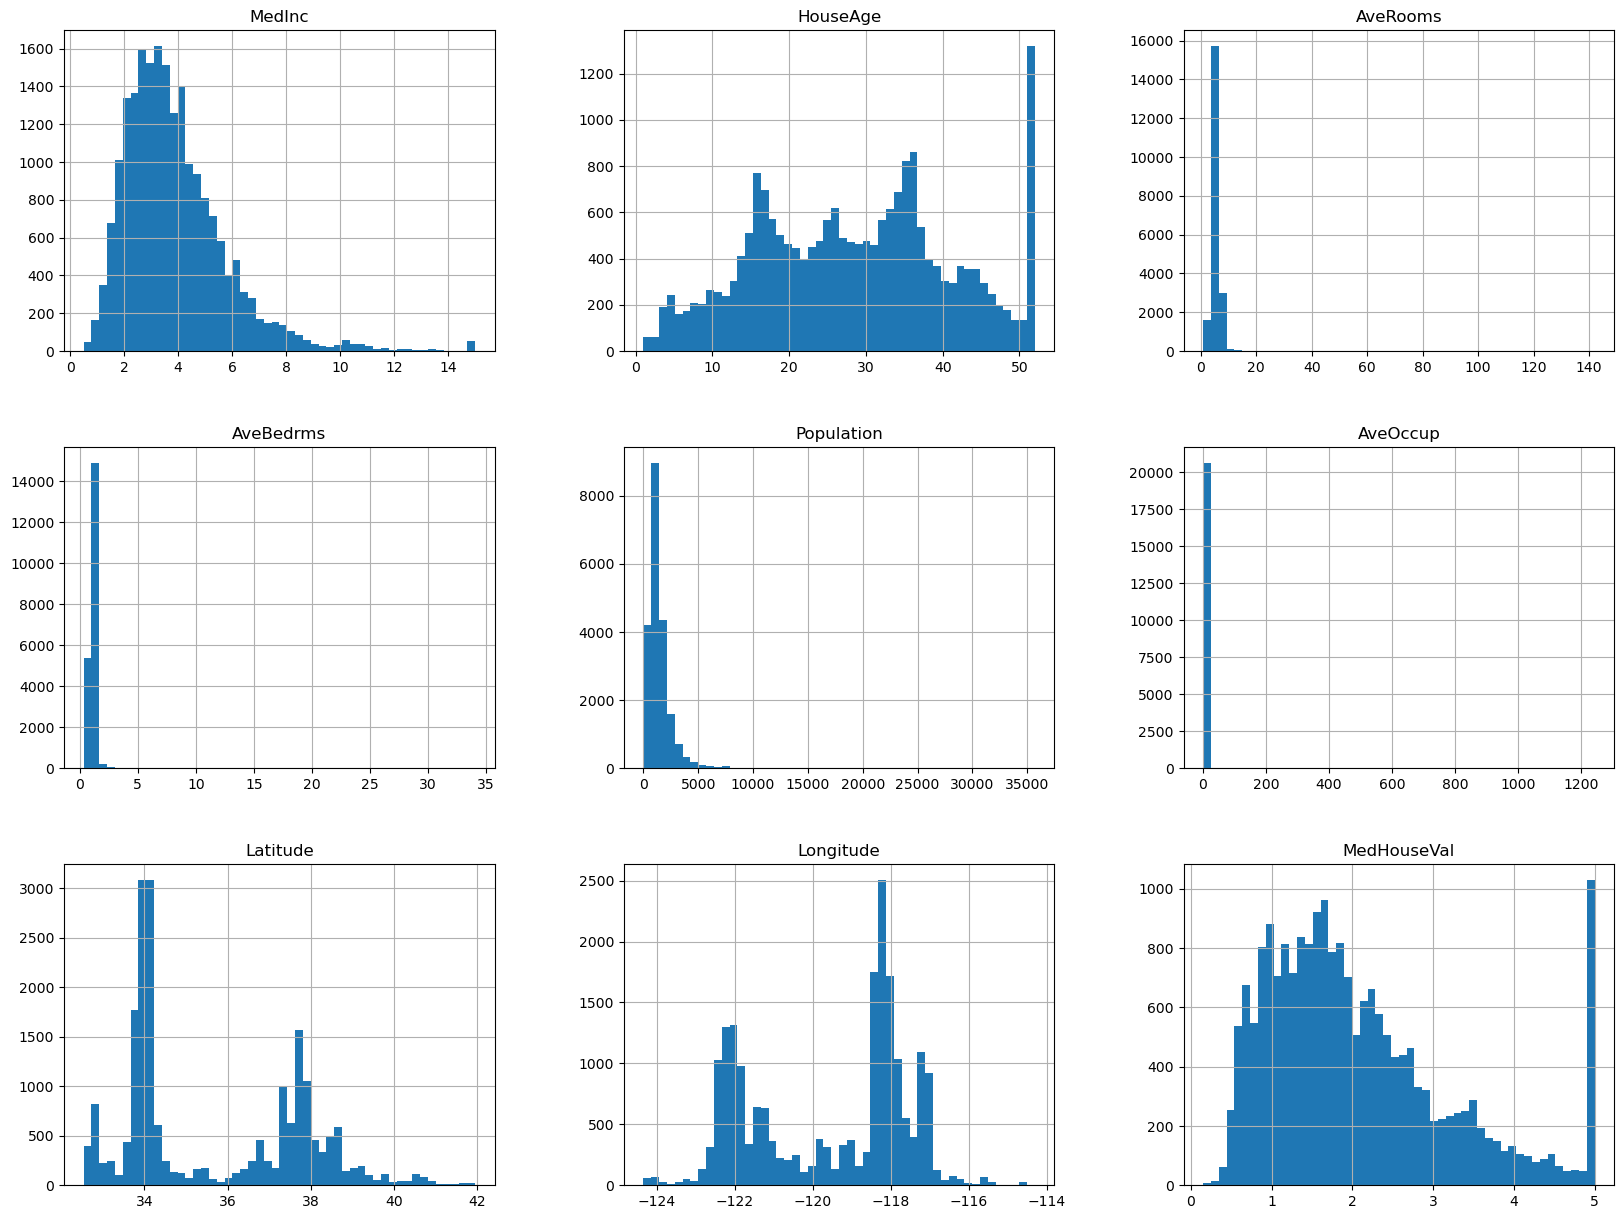

In [9]:
## Let us further explore the data distribution of each of the 8 features plus the target of the data 'median house value'
housing.frame.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
### The median income attribute appears adjusted, with values capped at 15 (15.0001) for higher incomes and 0.5 (0.4999) for lower incomes, roughly representing tens of thousands of dollars. Understanding the preprocessing methodology is vital in machine learning analysis. Also The housing age and the median house value are also capped

#### Ultimately, numerous histograms exhibit a right skew, stretching significantly further to the right of the median than to the left. This skewness might pose challenges for certain machine learning algorithms in pattern detection.

## Next we will visualize the Geographical Data



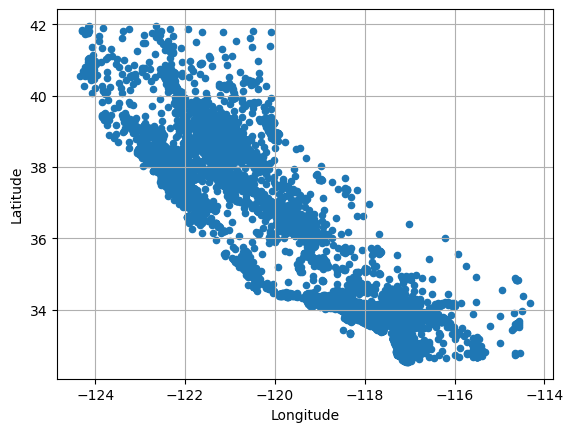

In [11]:
housing.frame.plot(kind ="scatter", x ="Longitude", y="Latitude", grid=True)
plt.show()

#### This does not give us any idea about the density of high data points. Visually we would like to see the high density areas of the various districts in California. For this we will now employ a predefined color map called jet, which ranges from blue(low values) to red (high prices)

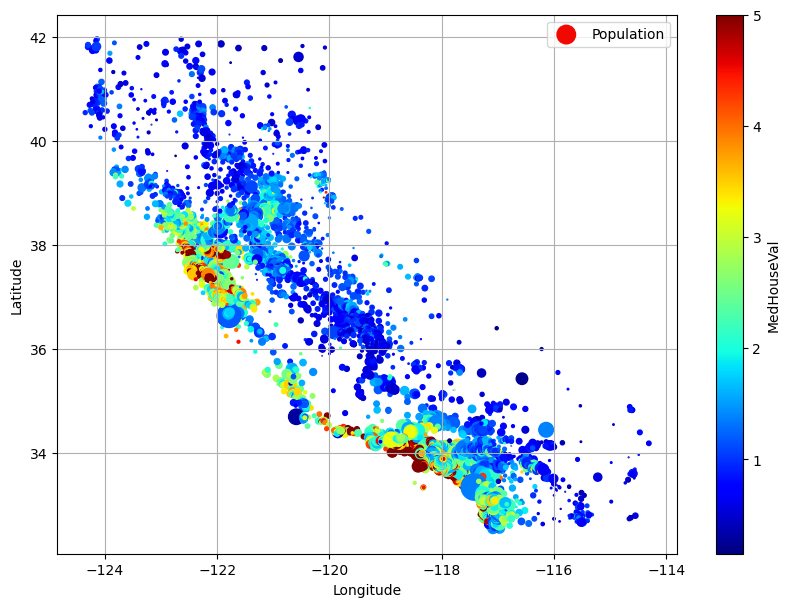

In [12]:
housing.frame.plot(kind = "scatter", x = "Longitude", y = "Latitude", grid = True, s=housing.frame['Population']/100, label="Population",
                  c="MedHouseVal", cmap="jet", colorbar =True, legend = True, sharex = False, figsize=(10,7))
plt.show()

#### From the above visualization, it is clear, that the houses in the inland districts are much cheaper than those along the bay area. People are willing to pay more for a house which has a view of the ocean.

## Next we look for Correlations between the input features

In [13]:
# we use the built-in corr() method
corr_house = housing.frame.corr()

In [14]:
# now we want to look at the correlation between the target and the rest of the input features
corr_house["MedHouseVal"]

MedInc         0.688075
HouseAge       0.105623
AveRooms       0.151948
AveBedrms     -0.046701
Population    -0.024650
AveOccup      -0.023737
Latitude      -0.144160
Longitude     -0.045967
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

#### we can clearly see that there is positive corelation between the Median house value and the median income of the house hold. Which means that houses which have a higher median income, live in high priced houses. Also we can see a slight negative correlation with the latitude, which suggests, that house prices can do down, when you go North - ( which is more into the inland area )

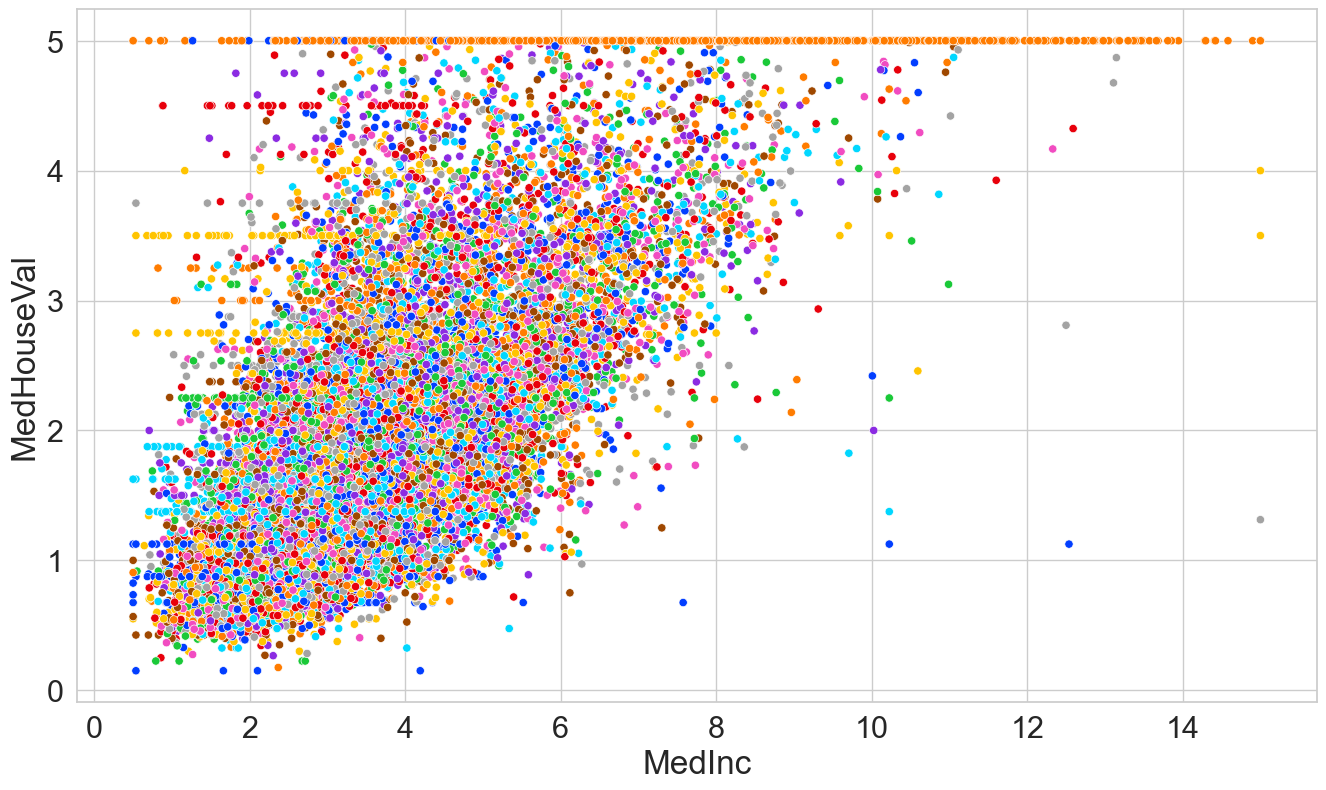

In [15]:
# first let us visualize the correlation between the median income and Median House Value
sns.set(font_scale =2)
sns.set_style('whitegrid')
plt.figure(figsize = (16,9))
sns.scatterplot(data=housing.frame, x="MedInc",y="MedHouseVal", hue="MedHouseVal",palette="bright", legend = False)
plt.show()

#### The above visualization supports our previous analysis on the correlation between the median income vs the median house value.

## Preparing the data for Machine Learning Algorithms

#### since we have already seen that the data provided are all numerical values without any missing data , we need not do much w.r.t cleaning and imputing the data

#### next we download the data, this time separately with the input features as X and the target variable as y(MedHouseVal)

In [16]:
X, y = datasets.fetch_california_housing(return_X_y=True)

#### we next split the dataset into training and test datasets, with the help of the sklearn functin 'train_test_split()'

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [18]:
x_train.shape

(15480, 8)

#### we will be using the make_pipeline( ) function to create a pipeline of pre-processing and a linear regressor

In [19]:
pipe = make_pipeline(StandardScaler(), LinearRegression())

#### we now train our training dataset with our pipeline created in the above step - with the help of the fit( ) method

In [20]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [21]:
y_pred = pipe.predict(x_test)

In [22]:
y_pred

array([2.27826207, 2.79606672, 1.90887117, ..., 2.15678592, 3.03507742,
       2.89088222])

In [23]:
r2s = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)

In [24]:
print(r2s, mse)

0.5911695436410487 0.540412806170908


## Trying with a different preprocessor 'MinMaxScaler'

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
pipe = make_pipeline(MinMaxScaler(feature_range =(-1,1)), LinearRegression())

In [27]:
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
r2s = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)

In [28]:
print(r2s, mse)

0.5911695436410489 0.5404128061709079


In [29]:
pipe.score(x_test,y_test)

0.5911695436410489